# Project 5: AllLife Credit Card Customer Segmentation
 
 
## Background:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

    Customer key - Identifier for the customer
    Average Credit Limit - Average credit limit across all the credit cards
    Total credit cards - Total number of credit cards
    Total visits bank - Total number of bank visits
    Total visits online - total number of online visits
    Total calls made - Total number of calls made by the customer

## Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your
disposal and to get an idea about the no of clusters. Perform EDA, create
visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10
marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram
and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and
answer all the key questions. (10 marks)

# Step 1: Exploratory Data Analysis

## Import Libraries and Load Dataset and do basic data checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import everything we will need
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn import metrics

In [3]:
#Lets load the Data csv file and look at the data
cc_data = pd.read_csv('Credit Card Customer Datav1.0.csv')
cc_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
#Lets  take a deeper look and draw some insights- info,shape, statistical summary, null check,
#incorrect imputation for credit card Data

cc_data.info()
print('')
print ('shape:', cc_data.shape)
print('')
print('size:', cc_data.size)

print(' ')

# check if there are any missing values in CC data via boolean
print("show the CC data with boolean: \n", cc_data.isnull())

# Count total NaN / missing values at each column for CC data
print(" \nCount total missing values at each column in a DataFrame : \n\n"), 
print( pd.DataFrame(cc_data.isnull().sum(), columns = ['Number of missing values']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB

shape: (660, 7)

size: 4620
 
show the CC data with boolean: 
      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0    False         False             False               False   
1    False         False             False               False   
2    False         False             False               False   
3    False         False             False               False   
4    False         False       

In [5]:
#Analysing the distribution of the various continuous attributes like min, max, mean, count, 25th percentile, median, 75th percentile 
cc_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


Insights
- there are 660 total records with 7 attributes. two of them are identifiers. it seems like smaller set of data with very few variables.
- the variables can be broken into two critrions- one on how many cards and credit limit the customer has and the other on how the customer interacts with the bank- physical visit, online or calls.
- it will be interesting to see how the clustering algortithms groups these records. i am guessing that the interaction method will have something to do with the grouping
- the data will definitely needs to be scaled as the credit limit is at a different magnitude than other variables
- There seems to be no null values in the data set
- it seems there are two identifiers for the customer- s.no and customer key. i will be interested to see if there are any duplicates

In [6]:
#Lets quickly check for any duplicates
duplicates = cc_data[cc_data.duplicated('Customer Key')]

In [7]:
duplicates

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


Seems like there are duplicates. lets review and clean it up if needed

In [8]:
#before taking any decision lets copmpare the duplicates
for i in duplicates['Customer Key']:
    display(cc_data[cc_data['Customer Key'] == i])


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Looking at this data it is safe to say that the some of the old records for the sutomer has not bee cleaned. This means the older or first record needs to be removed and the latest one needs to be kept. we will do that now

In [9]:
#Lets clean up

cc_data.drop_duplicates(subset=['Customer Key'], keep='last', inplace = True)

In [10]:
#Now that the duplicates are removed, Lets check the data again
cc_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,655.0,331.552672,190.407385,1.0,167.5,331.0,496.5,660.0
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34563.358779,37648.200947,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.711450,2.172410,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.404580,1.625385,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.601527,2.920192,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.575573,2.855867,0.0,1.0,3.0,5.0,10.0


Not much changed other than the fact we have 5 less records. 

In [11]:
# Lets quickly check the skeness of the data

cc_data.skew()

Sl_No                 -0.001643
Customer Key           0.048520
Avg_Credit_Limit       2.209182
Total_Credit_Cards     0.140402
Total_visits_bank      0.140206
Total_visits_online    2.234473
Total_calls_made       0.658983
dtype: float64

there seems to be some skewness in the Average card limit and Total visits online. we should check the plots. but lets scale the data first

In [12]:
# Lets scale the data

from sklearn.preprocessing import StandardScaler

cc_scaledata = cc_data.copy()
cc_scaledata [:] = StandardScaler().fit_transform(cc_scaledata)

In [13]:
cc_scaledata

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.737355,1.251195,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,-1.732099,-0.650482,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,-1.726844,-1.474051,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-1.721588,-0.569114,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-1.711076,0.139750,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
...,...,...,...,...,...,...,...
655,1.705266,-0.154379,1.712854,2.436277,-0.864813,2.535493,-1.252966
656,1.710522,0.221743,1.314124,2.436277,-0.864813,3.563608,-0.552118
657,1.715778,-0.047842,2.935626,1.514937,-0.864813,2.192789,-0.902542
658,1.721034,1.000369,3.653340,2.436277,-0.864813,4.249018,-1.252966


In [14]:
#Lets drop the SI_No and Customer Key

cc_scaledata.drop(['Sl_No','Customer Key'], axis = 1, inplace = True)

In [15]:
cc_scaledata

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
...,...,...,...,...,...
655,1.712854,2.436277,-0.864813,2.535493,-1.252966
656,1.314124,2.436277,-0.864813,3.563608,-0.552118
657,2.935626,1.514937,-0.864813,2.192789,-0.902542
658,3.653340,2.436277,-0.864813,4.249018,-1.252966


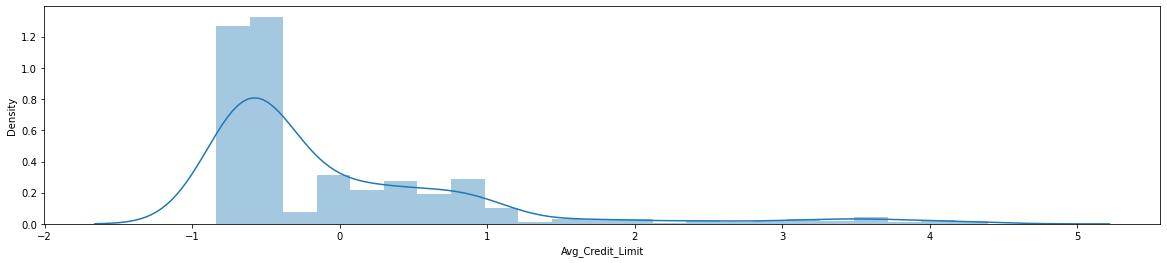

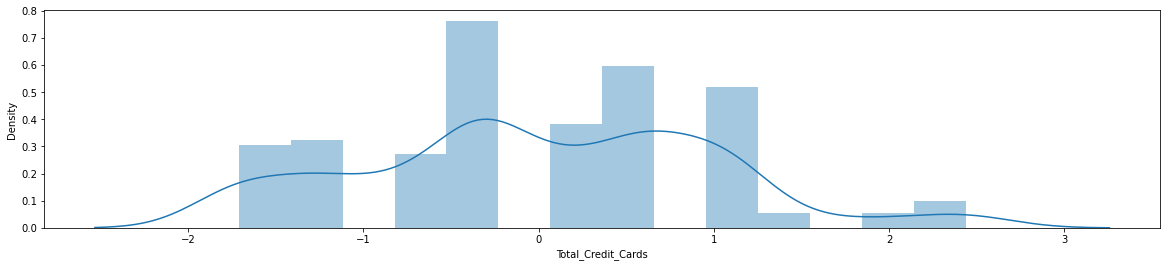

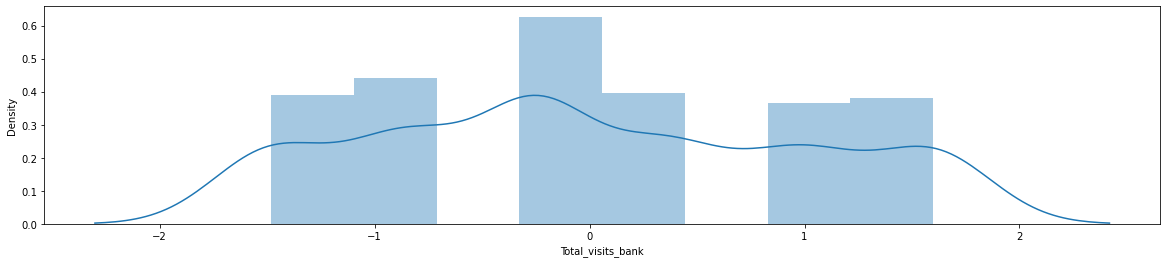

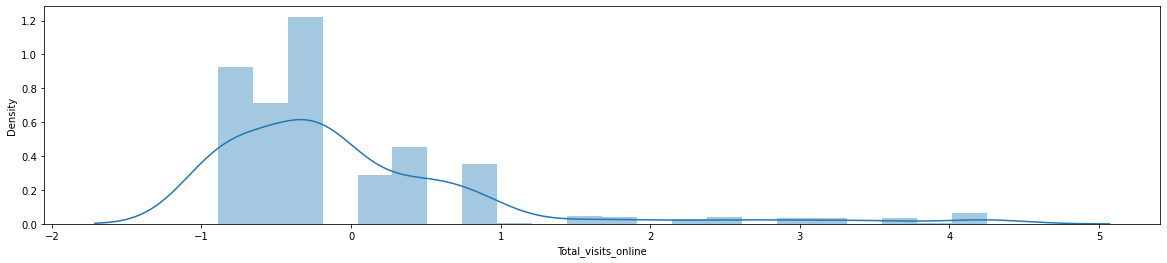

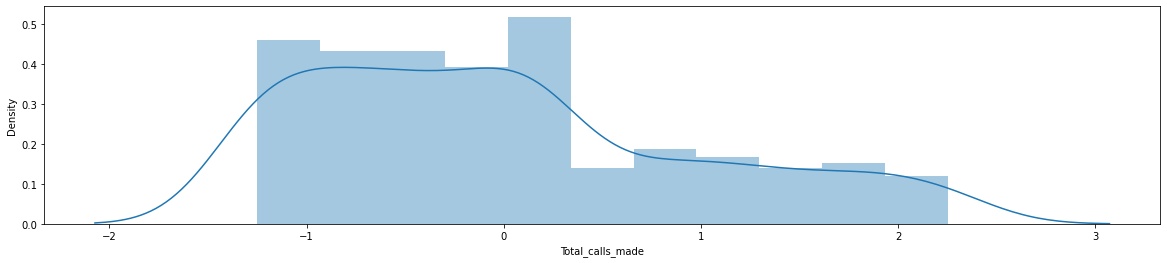

In [16]:
# distplot for continous columns
for i in cc_data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]:
    plt.figure(figsize=(20,4))
    sns.distplot(cc_scaledata[i], kde = True)
    plt.show()

We can still see some skewness in the credit card limit and total visits online. buts that ok. this is whole point of clustering as it will build clusters for the different kinds of credit card customers. lets look at the box plot

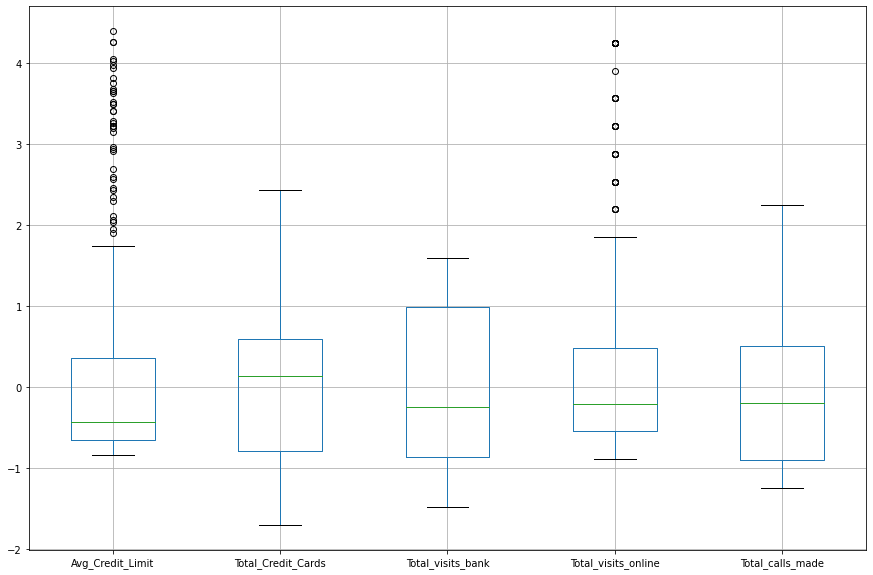

In [17]:
#Lets quickly do some box plots to check the quartiles and the outliers
plt.figure(figsize=(15,10))
cc_scaledata.boxplot()
plt.show()

as expected, there are many outliers for Average credit limit and total visits line. I will be very interested to see how the clusters are formed and what impact these outliers have on it.

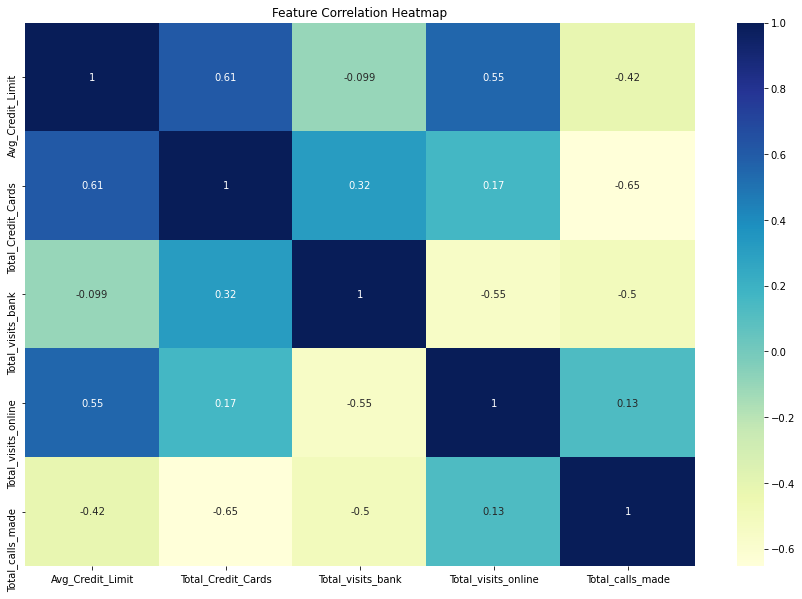

In [18]:
#Lets do a quick correlation heatmap
plt.figure(figsize=(15,10))
plt.title("Feature Correlation Heatmap")
sns.heatmap(cc_scaledata.corr(), annot = True, cmap="YlGnBu")

It does not seems there is much correlation between features.

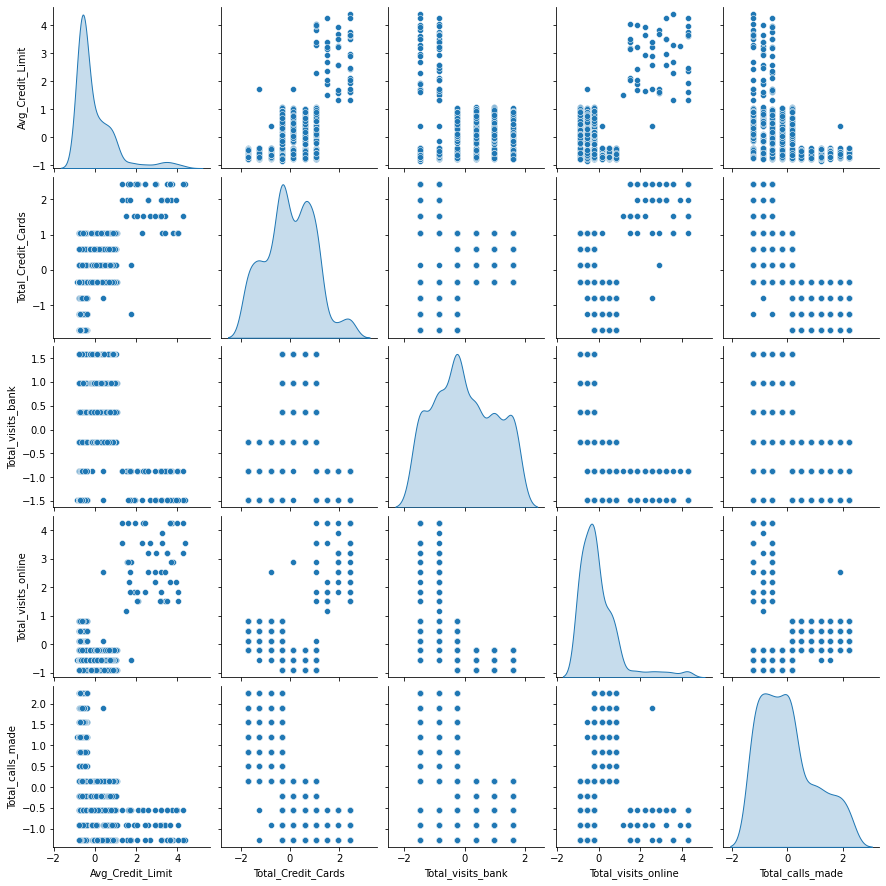

In [19]:
#Lets do some pairplots
sns.pairplot(cc_scaledata[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde')
plt.show()

it is not very clear on how many clusters to go with here based on the pairplots. i can see anywhere from 3 to 6 or 7 clusters. but some of them look very small and not sure what will be good number. we will probably have to run some loop code to find the optimal number of clusters for K-Means. we will do that next 

## K-Means Clustering

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

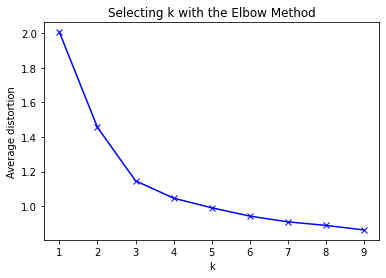

In [20]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cc_scaledata)
    prediction=model.predict(cc_scaledata)
    meanDistortions.append(sum(np.min(cdist(cc_scaledata, model.cluster_centers_, 'euclidean'), axis=1)) / cc_scaledata.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

it seems there is a clear bend at the k = 3. lets try to work with that. I will also check with k =4 and we can check the silhouette score for both of them

In [21]:
# Let us first model with start with K = 3

from sklearn.metrics import silhouette_score
cc_model=KMeans(3)
cc_model.fit(cc_scaledata)
prediction=cc_model.predict(cc_scaledata)

#Append the prediction 
cc_data["Group_K3"] = prediction
print("Groups Assigned : \n")
cc_data.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group_K3
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
5,6,58634,20000,3,0,1,8,0


In [22]:
cc_data.groupby('Group_K3').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group_K3,,,,,,,
0,222,222,222,222,222,222,222
1,384,384,384,384,384,384,384
2,49,49,49,49,49,49,49


In [23]:
cc_data.groupby('Group_K3').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group_K3,,,,,,,
0,118.225225,55128.536036,12180.180180,2.405405,0.936937,3.567568,6.851351
1,417.609375,54782.703125,33809.895833,5.523438,3.481771,0.986979,2.005208
2,623.653061,56897.979592,141877.551020,8.795918,0.612245,10.877551,1.040816


with three clusters two of the clusters hold 90+% of the data. that being said, i feel the last cluster (Group 2) is important as it holds the customers with high limits and high number of cards. and also have high online visits. although this number is small. it seems like a very important group of people from a marketing perspective. lets check the silhuoette score

In [24]:
#Lets check the silhoette score for K = 3
labels = cc_model.labels_
score = silhouette_score(cc_scaledata, labels, metric='euclidean')
score

0.5156757893111308

The Silhuoette score is not the best but i am not sure if we can do any better

In [25]:
#Lets build a results table to hold the scores for all methods
method = []
sil_score=[]

In [26]:
method.append('Kmeans K3')
sil_score.append(score)

In [27]:
#Since the Silhouette score is low, lets try kmeans with K = 4

In [28]:
cc_model=KMeans(4)
cc_model.fit(cc_scaledata)
prediction_k4=cc_model.predict(cc_scaledata)

#Append the prediction 
cc_data["Group_K4"] = prediction_k4
print("Groups Assigned : \n")
cc_data.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group_K3,Group_K4
0,1,87073,100000,2,1,1,0,1,3
1,2,38414,50000,3,0,10,9,0,1
2,3,17341,50000,7,1,3,4,1,3
3,4,40496,30000,5,1,1,4,1,3
5,6,58634,20000,3,0,1,8,0,1


In [29]:
cc_data.groupby('Group_K4').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group_K3
Group_K4,,,,,,,,
0,188,188,188,188,188,188,188,188
1,219,219,219,219,219,219,219,219
2,49,49,49,49,49,49,49,49
3,199,199,199,199,199,199,199,199


In [30]:
cc_data.groupby('Group_K4').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group_K3
Group_K4,,,,,,,,
0,415.505319,55522.101064,31255.319149,5.494681,4.510638,1.021277,1.946809,1.000000
1,118.178082,55144.474886,12173.515982,2.388128,0.931507,3.589041,6.904110,0.000000
2,623.653061,56897.979592,141877.551020,8.795918,0.612245,10.877551,1.040816,2.000000
3,415.135678,54071.849246,35904.522613,5.522613,2.477387,0.969849,2.075377,0.984925


i dont think 4 clusters help. i can clearly see thet group 0 and group 3 are very similar to each other. the score is probably lover

In [31]:
#Lets check the silhouette score
labels = cc_model.labels_
score = silhouette_score(cc_scaledata, labels, metric='euclidean')
score

0.35543523967554014

In [32]:
method.append('Kmeans K4')
sil_score.append(score)

In [33]:
#i am going to perform Kmeans for K = 2 as well. not excpecting any better results
cc_model=KMeans(2)
cc_model.fit(cc_scaledata)

KMeans(n_clusters=2)

In [34]:
labels = cc_model.labels_
score = silhouette_score(cc_scaledata, labels, metric='euclidean')
score

0.4191048769542048

In [35]:
method.append('Kmeans K2')
sil_score.append(score)

In [36]:
#clearly out of all the Ks, The K=3 has a much better score. Lets move forward with this result and predictions.

In [37]:
cc_scaledata["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC84DA0850>,
      dtype=object)

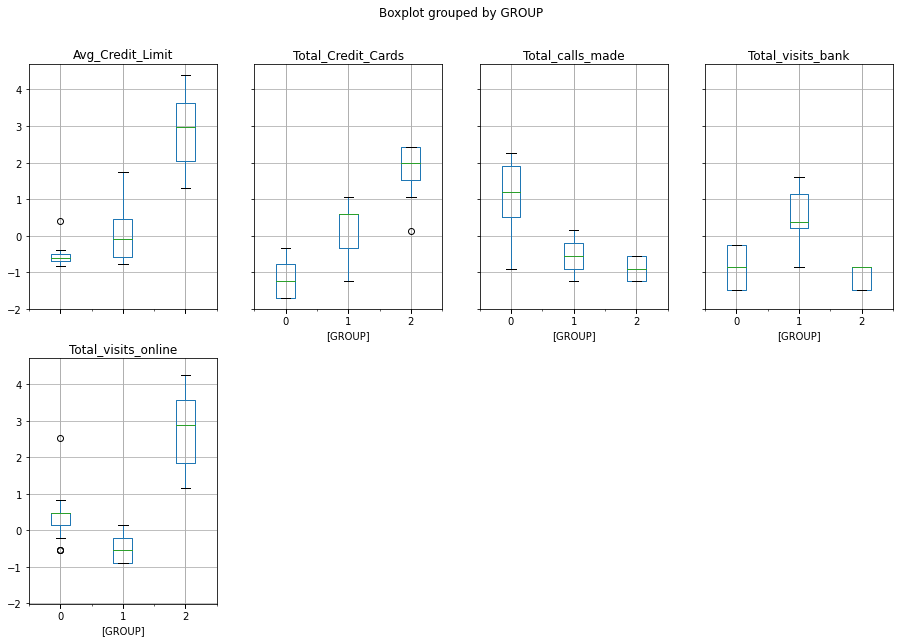

In [38]:
cc_scaledata.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

## Hierarchical Clustering

Lets Try hierarchical clustering now and compare it to Kmeans

In [39]:
#lets quickly cleanup our dataframe to avoid contamination
cc_scaledata.drop('GROUP', axis = 1, inplace = True)

In [40]:
cc_scaledata

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
...,...,...,...,...,...
655,1.712854,2.436277,-0.864813,2.535493,-1.252966
656,1.314124,2.436277,-0.864813,3.563608,-0.552118
657,2.935626,1.514937,-0.864813,2.192789,-0.902542
658,3.653340,2.436277,-0.864813,4.249018,-1.252966


First we will try to find what will be best linkage to use. we can use scipy functions in a loop to do this and compare the cophenetic scores

In [41]:
#Lets try to get the cophentic scores of all kinds of links and then we can pick the best one
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

links = ['complete', 'average', 'ward', 'single', 'weighted', 'centroid', 'median']


for link in links:
    Z = linkage(cc_scaledata, method=link, metric='euclidean')
    c, coph_dists = cophenet(Z , pdist(cc_scaledata))
    print('links:',link,':', c)

links: complete : 0.8667328091184989
links: average : 0.8978313900952013
links: ward : 0.7399284005362226
links: single : 0.7394304750525083
links: weighted : 0.8773838357840723
links: centroid : 0.8948399875872217
links: median : 0.8174435946675414


Now that we know we can use average method and eculidean metric we create the dendogram to find out the best number of clusters to use. we will do the dendogram for other linkages as well just to see how it looks

In [42]:
#Lets try complete method

Z = linkage(cc_scaledata, method='complete', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(cc_scaledata))
c

0.8667328091184989

the cophenetic score seems good but lets see what other methods produce

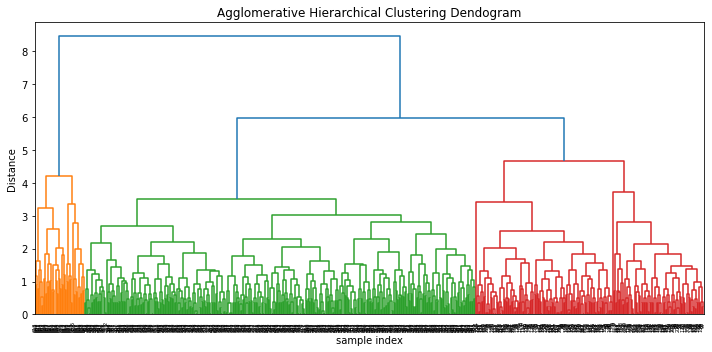

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z )
plt.tight_layout()

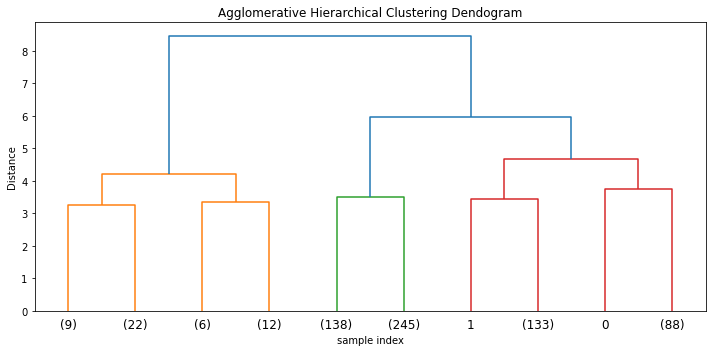

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',  p=10  )
plt.tight_layout()

In [45]:
#Lets try Ward method

Z = linkage(cc_scaledata, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(cc_scaledata))
c

0.7399284005362226

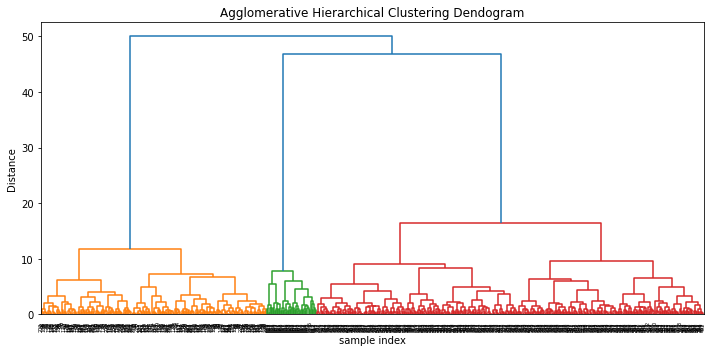

In [46]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z )
plt.tight_layout()

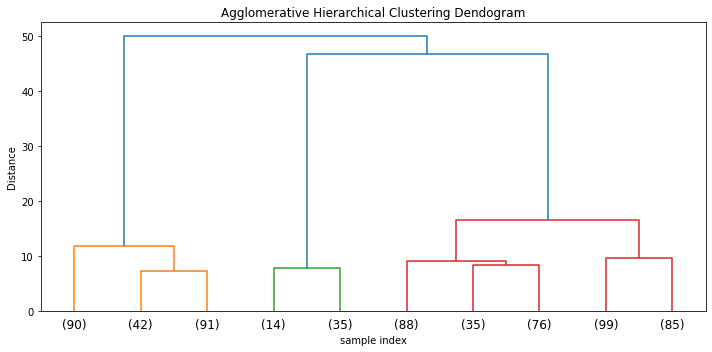

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',  p=10  )
plt.tight_layout()

In [48]:
#Lets do single

Z = linkage(cc_scaledata, method='single', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(cc_scaledata))
c

0.7394304750525083

The cophenetic score of single method seems low compares to others so far

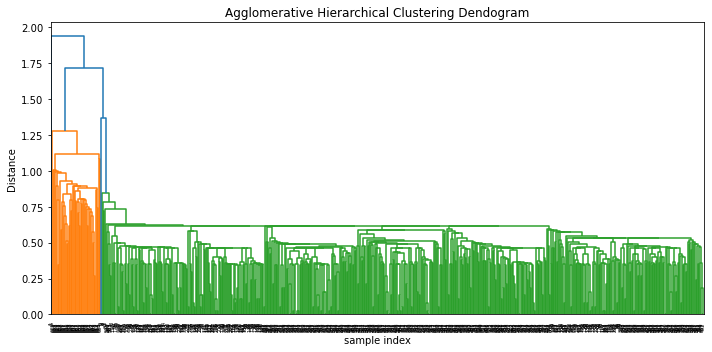

In [49]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z )
plt.tight_layout()

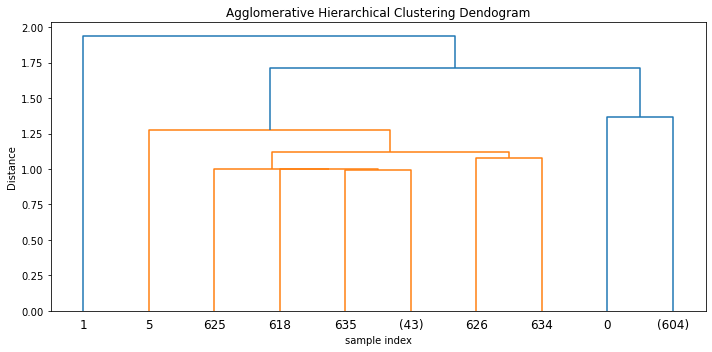

In [50]:
#lets do a truncated view
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',  p=10  )
plt.tight_layout()

In [51]:
#Finally lets do average which is probably the best one

Z = linkage(cc_scaledata, method='average', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(cc_scaledata))
c

0.8978313900952013

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z )
plt.tight_layout()

Lets do a truncated view of the dendogram

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',  p=10  )
plt.tight_layout()

In [ ]:
#since average is the best method by the cophenetic score, we will go ahead and use this dendogram
#Lets do the horizontal cut at 3.  we can also try to cut at 2 and 
#see what kind of scores we get
max_d = 3

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters.shape)
clusters

Seems like with cut at 3 we get 4 clusters. 

In [ ]:
#Lets calcualte the silhoette score for cut at 3 distance
score = silhouette_score(cc_scaledata, clusters, metric="euclidean")
score

In [ ]:
method.append('HC 4 clusters')
sil_score.append(score)

In [ ]:
cc_data['HC Group 4'] = clusters
cc_data

In [ ]:
cc_data.groupby('HC Group 4').count()

In [ ]:
cc_data.groupby('HC Group 4').mean()

Clearly 4 clusters is not the best approach. the 4th cluster only has 1 record and the silhuoette score is also pretty low. lets 2 and 3 clusters and see what we find. lets use sklearn to do this clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(cc_scaledata)
prediction3 = model.labels_

In [ ]:
score = silhouette_score(cc_scaledata, prediction3)
score

In [ ]:
method.append('HC 3 clusters')
sil_score.append(score)

In [ ]:
cc_data['HC Group 3'] = model.labels_
cc_data.head(10)

In [ ]:
cc_data.groupby('HC Group 3').count()

In [ ]:
cc_data.groupby('HC Group 3').mean()

the clustering/grouping we are seeing here seems very similar to Kmeans and seem directly related to how the customer interacts with the bank.

In [ ]:
#Now lets try 2 clusters also as i am interested to see what we get
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(cc_scaledata)
prediction2 = model.labels_

In [ ]:
score = silhouette_score(cc_scaledata, prediction2)
score

In [ ]:
method.append('HC 2 clusters')
sil_score.append(score)

Even though the sihuette score for 2 clusters seems to be better, lets see what kind of info it gives us

In [ ]:
cc_data['HC Group 2'] = model.labels_
#cc_scaledata['HC Group 2'] = model.labels_
cc_data.head(10)

In [ ]:
cc_data.groupby('HC Group 2').count()

In [ ]:
cc_data.groupby('HC Group 2').mean()

Even though the silhuette score was better for cluster 2, it is only giving us two groups of customers. To be honesty i think 3 clusters of customer is amuch better model for the bank. as with 2 clusters 90% of the customers are in 1 group and only handul in the other. this does not tell much to the bank. so we will move forward with the 3 clusters

In [ ]:
cc_scaledata['HC Group 3'] = prediction3

In [ ]:
#Now lets do some box plots
cc_scaledata.boxplot(by='HC Group 3', layout = (2,4),figsize=(15,10))

## Insights

We get the exactly same results with the hierarchical clustering that we got with kmeans

Group 0 --> semi premium customers who have mid level credit limit and number of credit cards. they mostly interact with bank by physical visits
Group 1 --> most premium customers who have the highest credit limits and number of cards. they mostly interact with bank online
Group 2 --> lowest tier of customers with the lowest credit limits and number of cards. they mostly interact with the bank via phone calls 

Comparing with Kmeans group 

- Kmeans(3) Group 0 is the same as HC Clustering Group 0 --> mid tier customers
- Kmeans(3) Group 1 is the same as HC Clustering Group 2 --> premium customers
- Kmeans(3) Group 2 is the same as HC Clustering Group 1 --> lower tier customers

In [ ]:
# DataFrame to compare silhuoette results.

results = pd.DataFrame()
results['Method'] = method
results['Silhuoette Score'] = sil_score
results = results.set_index('Method')
results

In [ ]:
#Average Silhuette score for kmeans clustering
kmeansavg = results.iloc[0:3,:].sum() / 3
kmeansavg

In [ ]:
#Average Silhuette score for Hierarchical Clustering
HCavg = results.iloc[3:6,:].sum() / 3
HCavg

## Key Questions and insights

Here are the questions asked in the problem statement

How many different segments of customers are there?
How are these segments different from each other?
What are your recommendations to the bank on how to better market to and service these customers?

There are three distinct group of customers and their differences:

- Customers who prefer to vist the bank in-person --> mid tier customers with the mid level CC limit and number of cards
- Customers who interact with the bank via phone  --> lower tier customers with lowest CC limit and number of cards
- Customers who interact with the bank online --> premium customers with the highest CC limit and number of cards

I think the best way to market and service these customers is to have tailored marketing and advertisement campaigns. sending emails or messages to customer who interact with the bank through in person visits will not be very successful. Whereas digital campaigns and upselling advertisements will be the most successful for the premium customers.

As for the in-person visit customers, the bank should design good ads and upselling campaigns within the physical bank locations itself. finally the users that interact with the bank via phone should be slowly pushed to visit the bank physically or use the online interactive tools. this might be a good way to bump the low tier customers into some of the upper tiers. 